<a href="https://colab.research.google.com/github/Priyanka31-dev/ML-Project/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Data Collection and Prcessing

In [ ]:
#loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('/content/heart.csv')

In [ ]:
#print first five rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
#print last five rows of the dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [ ]:
#number of rows and columns in the dataset
heart_data.shape

(1025, 14)

In [ ]:
#getting some info about dataset
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
#checking for missing values
heart_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
#statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000



Descriptive statistics for numerical features:
                age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053 

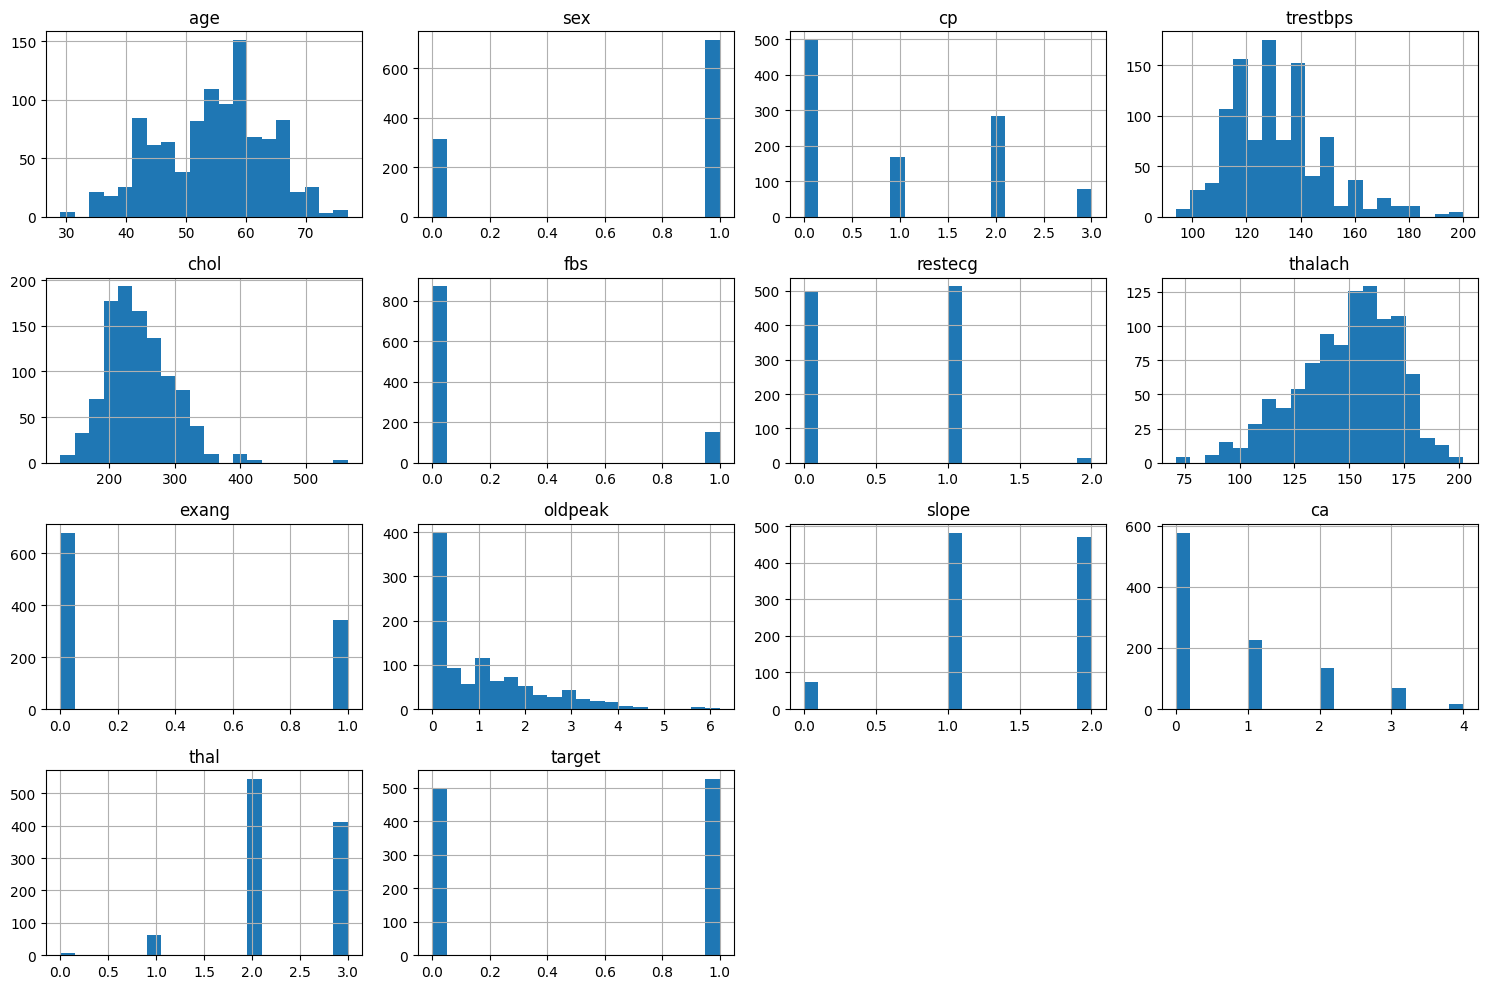


Target variable distribution:
 target
1    51.317073
0    48.682927
Name: proportion, dtype: float64


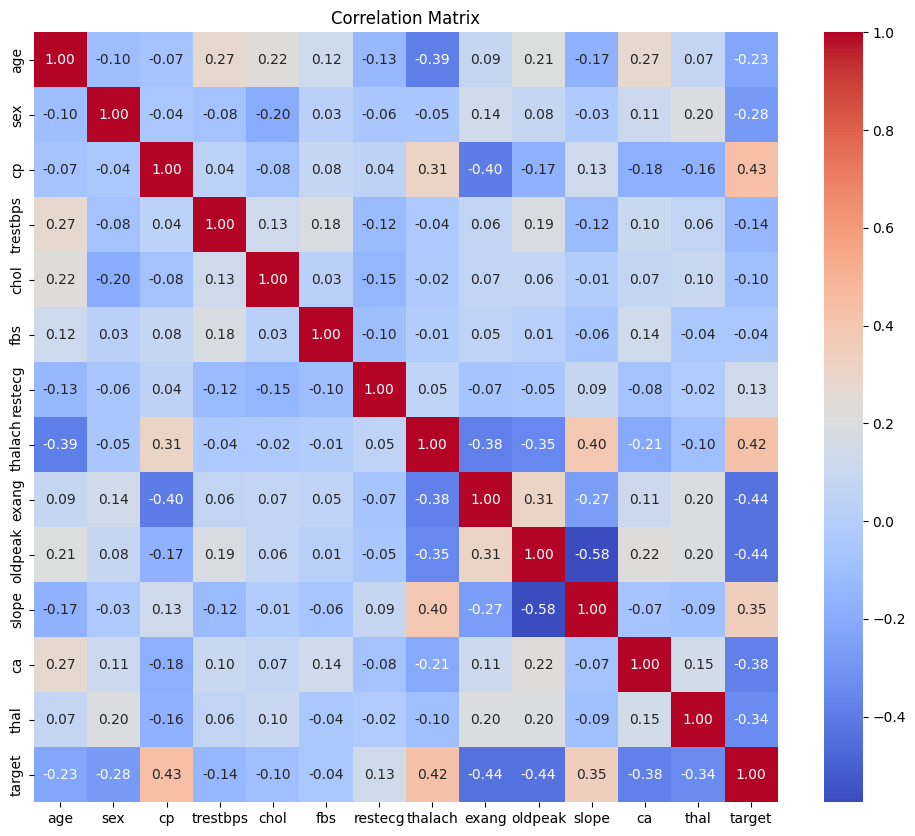


Value counts for sex:
sex
1    713
0    312
Name: count, dtype: int64

Value counts for cp:
cp
0    497
2    284
1    167
3     77
Name: count, dtype: int64

Value counts for fbs:
fbs
0    872
1    153
Name: count, dtype: int64

Value counts for restecg:
restecg
1    513
0    497
2     15
Name: count, dtype: int64

Value counts for exang:
exang
0    680
1    345
Name: count, dtype: int64

Value counts for slope:
slope
1    482
2    469
0     74
Name: count, dtype: int64

Value counts for ca:
ca
0    578
1    226
2    134
3     69
4     18
Name: count, dtype: int64

Value counts for thal:
thal
2    544
3    410
1     64
0      7
Name: count, dtype: int64


In [ ]:
# Descriptive Statistics
print("\nDescriptive statistics for numerical features:\n", heart_data.describe())

# Data Distribution (Histograms)
import matplotlib.pyplot as plt
heart_data.hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

# Target Variable Distribution
print("\nTarget variable distribution:\n",heart_data['target'].value_counts(normalize=True) * 100)

# Correlation Analysis
correlation_matrix =heart_data.corr()
plt.figure(figsize=(12, 10))
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Categorical Feature Analysis
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
for col in categorical_cols:
    print(f"\nValue counts for {col}:\n{heart_data[col].value_counts()}")

In [ ]:
#checking the distribution of Target Variables
heart_data['target'].value_counts()

,count
target,
1,526
0,499


1 --> Defective Heart

0 --> Healthy Heart

splitting the features and target

In [ ]:
x = heart_data.drop(columns='target', axis=1)
y= heart_data['target']

In [ ]:
print(x)

      age  sex  cp  trestbps  chol  ...  exang  oldpeak  slope  ca  thal
0      52    1   0       125   212  ...      0      1.0      2   2     3
1      53    1   0       140   203  ...      1      3.1      0   0     3
2      70    1   0       145   174  ...      1      2.6      0   0     3
3      61    1   0       148   203  ...      0      0.0      2   1     3
4      62    0   0       138   294  ...      0      1.9      1   3     2
...   ...  ...  ..       ...   ...  ...    ...      ...    ...  ..   ...
1020   59    1   1       140   221  ...      1      0.0      2   0     2
1021   60    1   0       125   258  ...      1      2.8      1   1     3
1022   47    1   0       110   275  ...      1      1.0      1   1     2
1023   50    0   0       110   254  ...      0      0.0      2   0     2
1024   54    1   0       120   188  ...      0      1.4      1   1     3

[1025 rows x 13 columns]


In [ ]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


splitting the data into the Training Data & Test Data

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, stratify=y, random_state=2)

In [ ]:
print(x.shape, x_train.shape, x_test.shape)

(1025, 13) (820, 13) (205, 13)


Model Training

Logistic Regression

In [ ]:
model = LogisticRegression()

In [ ]:
#training the LogisticRegression model with Training data
model.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation

Accuracy Score

In [ ]:
#accuracy on training data
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8524390243902439


In [ ]:
#accuracy on test data
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [ ]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.8048780487804879


Building a Predictive System

In [ ]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# Get the feature names from the training data
feature_names = x_train.columns

# change the input data to a Pandas DataFrame with feature names
input_data_as_dataframe = pd.DataFrame([input_data], columns=feature_names)


prediction = model.predict(input_data_as_dataframe)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease
